<a href="https://colab.research.google.com/github/mybenkhadda/YanPort_Duplicate/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [98]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=00688578f98aafe4319964aa6c0dd401aaeb39a9771b59b13a7eaabfd6de3b31
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [99]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import math
from sentence_transformers import SentenceTransformer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load data file

In [111]:
df = pd.read_csv("data.csv")

In [112]:
df.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,...,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,...,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,...,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,...,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,...,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


# Explore the data

In [113]:
print(f"Shape of the dataframe is : {df.shape}")

Shape of the dataframe is : (2164, 57)


In [114]:
print(f"Columns in the dataframe are : {[i for i in df.columns]}")

Columns in the dataframe are : ['ID', 'URL', 'CRAWL_SOURCE', 'PROPERTY_TYPE', 'NEW_BUILD', 'DESCRIPTION', 'IMAGES', 'SURFACE', 'LAND_SURFACE', 'BALCONY_SURFACE', 'TERRACE_SURFACE', 'ROOM_COUNT', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'LUNCHROOM_COUNT', 'TOILET_COUNT', 'FURNISHED', 'FIREPLACE', 'AIR_CONDITIONING', 'GARDEN', 'SWIMMING_POOL', 'BALCONY', 'TERRACE', 'CELLAR', 'PARKING', 'PARKING_COUNT', 'HEATING_TYPES', 'HEATING_MODE', 'FLOOR', 'FLOOR_COUNT', 'CONSTRUCTION_YEAR', 'ELEVATOR', 'CARETAKER', 'ENERGY_CONSUMPTION', 'GREENHOUSE_GAS_CONSUMPTION', 'MARKETING_TYPE', 'PRICE', 'PRICE_M2', 'PRICE_EVENTS', 'RENTAL_EXPENSES', 'RENTAL_EXPENSES_INCLUDED', 'DEPOSIT', 'FEES', 'FEES_INCLUDED', 'EXCLUSIVE_MANDATE', 'AGENCIES_UNWANTED', 'OCCUPIED', 'DEALER_NAME', 'DEALER_TYPE', 'CITY_ID', 'CITY', 'ZIP_CODE', 'DEPT_CODE', 'PUBLICATION_START_DATE', 'PUBLICATION_END_DATE', 'LAST_CRAWL_DATE', 'LAST_PRICE_DECREASE_DATE']


In [115]:
df.isnull().sum()

ID                               0
URL                              0
CRAWL_SOURCE                     0
PROPERTY_TYPE                    0
NEW_BUILD                      191
DESCRIPTION                      4
IMAGES                           0
SURFACE                        114
LAND_SURFACE                  2161
BALCONY_SURFACE               2164
TERRACE_SURFACE               2139
ROOM_COUNT                     329
BEDROOM_COUNT                 1468
BATHROOM_COUNT                2164
LUNCHROOM_COUNT               2164
TOILET_COUNT                  2164
FURNISHED                     1697
FIREPLACE                     2164
AIR_CONDITIONING              2164
GARDEN                        2150
SWIMMING_POOL                 2158
BALCONY                       2164
TERRACE                       2078
CELLAR                        2164
PARKING                          0
PARKING_COUNT                 2007
HEATING_TYPES                    0
HEATING_MODE                  1511
FLOOR               

> Let's delete the columns with 100% NaN values

In [116]:
df = df.drop(["LAND_SURFACE","BALCONY_SURFACE", "BATHROOM_COUNT", "LUNCHROOM_COUNT", "TOILET_COUNT", "FIREPLACE", "AIR_CONDITIONING","BALCONY", "CELLAR", "ENERGY_CONSUMPTION", "GREENHOUSE_GAS_CONSUMPTION", "PUBLICATION_END_DATE", "TERRACE_SURFACE","LAST_CRAWL_DATE","LAST_PRICE_DECREASE_DATE"], axis=1)

## Crawl Source

In [117]:
fig = px.histogram(
    df, x = "CRAWL_SOURCE"
)
fig.show()

> This column could be deleted later to reduce complexity

## PROPERTY_TYPE

In [118]:
fig = px.histogram(
    df, x = "PROPERTY_TYPE"
)
fig.show()

## NEW_BUILD

In [119]:
df['NEW_BUILD'] = df['NEW_BUILD'].fillna(False)

In [120]:
fig = px.histogram(
    df, x = "NEW_BUILD"
)
fig.show()

## SURFACE

In [121]:
df['SURFACE'] = df['SURFACE'].fillna(df["SURFACE"].median())

In [122]:
fig = px.box(df, y="SURFACE")
fig.show()

## ROOM_COUNT

In [123]:
df["ROOM_COUNT"] = df["ROOM_COUNT"].fillna(df["ROOM_COUNT"].median())

In [124]:
fig = px.histogram(
    df, x = "ROOM_COUNT"
)
fig.show()

## BEDROOM_COUNT

In [125]:
df["BEDROOM_COUNT"] = df["BEDROOM_COUNT"].fillna(df["BEDROOM_COUNT"].median())

In [126]:
fig = px.histogram(
    df, x = "BEDROOM_COUNT"
)
fig.show()

## FURNISHED

In [127]:
df["FURNISHED"] = df["FURNISHED"].fillna(df["FURNISHED"].median())

In [128]:
fig = px.histogram(
    df, x = "FURNISHED"
)
fig.show()

## GARDEN

> Publications that didn't mention the GARDEN means that they don't have any, let's fill it with 0

In [129]:
df['GARDEN'] = df['GARDEN'].fillna(0)

In [130]:
fig = px.histogram(
    df, x = "GARDEN"
)
fig.show()

## SWIMMING_POOL

In [131]:
df['SWIMMING_POOL'] = df['SWIMMING_POOL'].fillna(0)

In [132]:
fig = px.histogram(
    df, x = "SWIMMING_POOL"
)
fig.show()

## TERRACE

In [133]:
df['TERRACE'] = df['TERRACE'].fillna(0)

In [134]:
fig = px.histogram(
    df, x = "TERRACE"
)
fig.show()

## PARKING

In [135]:
fig = px.histogram(
    df, x = "PARKING"
)
fig.show()

## PARKING_COUNT

In [136]:
df["PARKING"].value_counts()

False    2007
True      157
Name: PARKING, dtype: int64

> Null values are basically 0,  since the column PARKING is False

In [137]:
df['PARKING_COUNT'] = df['PARKING_COUNT'].fillna(0)

In [138]:
fig = px.histogram(
    df, x = "PARKING_COUNT"
)
fig.show()

## HEATING_TYPES

In [139]:
fig = px.histogram(
    df, x = "HEATING_TYPES"
)
fig.show()

## HEATING_MODE

In [140]:
df['HEATING_MODE'] = df['HEATING_MODE'].fillna("-")

In [141]:
fig = px.histogram(
    df, x = "HEATING_MODE"
)
fig.show()

## FLOOR

In [142]:
df['FLOOR'] = df['FLOOR'].fillna(df['FLOOR'].median())

In [143]:
fig = px.histogram(
    df, x = "FLOOR"
)
fig.show()

## COUNT_FLOOR

In [144]:
fig = px.histogram(
    df, x = "FLOOR_COUNT"
)
fig.show()

In [145]:
df = df.drop(["FLOOR_COUNT"], axis=1)

## CONSTRUCTION_YEAR             

In [146]:
df['CONSTRUCTION_YEAR'] = df['CONSTRUCTION_YEAR'].fillna(df['CONSTRUCTION_YEAR'].median())

In [147]:
fig = px.histogram(
    df, x = "CONSTRUCTION_YEAR", nbins = 50
)
fig.show()

## ELEVATOR

In [148]:
df['ELEVATOR'] = df['ELEVATOR'].fillna(False)

In [149]:
fig = px.histogram(
    df, x = "ELEVATOR"
)
fig.show()

## CARETAKER

In [150]:
df['CARETAKER'] = df['CARETAKER'].fillna(False)

In [151]:
fig = px.histogram(
    df, x = "CARETAKER"
)
fig.show()

## MARKETING_TYPE

In [152]:
fig = px.histogram(
    df, x = "MARKETING_TYPE"
)
fig.show()

## PRICE

In [153]:
import re
pattern = "\"price\":([0-9]+)"
l = []
for i in range(df.shape[0]):
  l.append(int(re.findall(pattern, df[["PRICE_EVENTS"]].iloc[i][0])[0]))

In [154]:
df["PRICE"] = l

In [155]:
fig = px.box(
    df, y = "PRICE"
)
fig.show()

## PRICE_M2

In [156]:
l = []
for i in range(df.shape[0]):
  if math.isnan(df.iloc[i]["PRICE_M2"]):
    l.append(float(df.iloc[i]["PRICE"])/float(df.iloc[i]["SURFACE"]))
  else:
    l.append(df.iloc[i]["PRICE_M2"])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [157]:
df["PRICE_M2"] = l

## PRICE_EVENTS

In [158]:
df = df.drop(["PRICE_EVENTS"], axis = 1)

## RENTAL_EXPENSES_INCLUDED

In [159]:
df['RENTAL_EXPENSES_INCLUDED'] = df['RENTAL_EXPENSES_INCLUDED'].fillna(False)

In [160]:
fig = px.histogram(
    df, x = "RENTAL_EXPENSES_INCLUDED"
)
fig.show()

## RENTAL_EXPENSES

In [161]:
l = df["RENTAL_EXPENSES"]
for i in range(df.shape[0]):
  if df.iloc[i]["RENTAL_EXPENSES_INCLUDED"] == False:
      l[i] = 0
df["RENTAL_EXPENSES"] = l

<ipython-input-161-efdfee45cb54>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
df['RENTAL_EXPENSES'] = df['RENTAL_EXPENSES'].fillna(df['RENTAL_EXPENSES'].mean())

In [163]:
fig = px.box(
    df, y = "RENTAL_EXPENSES"
)
fig.show()

## DEPOSIT

In [164]:
df['DEPOSIT'] = df['DEPOSIT'].fillna(df['DEPOSIT'].mean())

In [165]:
fig = px.box(
    df, y = "DEPOSIT"
)
fig.show()

## FEES_INCLUDED

In [166]:
df['FEES_INCLUDED'] = df['FEES_INCLUDED'].fillna(False)

In [167]:
fig = px.histogram(
    df, x = "FEES_INCLUDED"
)
fig.show()

## FEES

In [168]:
df['FEES'] = df['FEES'].fillna(0)

In [169]:
fig = px.box(
    df, y = "FEES"
)
fig.show()

## EXCLUSIVE_MANDATE

In [170]:
df['EXCLUSIVE_MANDATE'] = df['EXCLUSIVE_MANDATE'].fillna(False)

In [171]:
fig = px.histogram(
    df, x = "EXCLUSIVE_MANDATE"
)
fig.show()

## AGENCIES_UNWANTED

In [172]:
df['AGENCIES_UNWANTED'] = df['AGENCIES_UNWANTED'].fillna(False)

In [173]:
fig = px.histogram(
    df, x = "AGENCIES_UNWANTED"
)
fig.show()

## OCCUPIED

In [174]:
df['OCCUPIED'] = df['OCCUPIED'].fillna(False)

In [175]:
fig = px.histogram(
    df, x = "OCCUPIED"
)
fig.show()

## DEALER

In [176]:
fig = px.histogram(
    df, x = "DEALER_TYPE"
)
fig.show()

In [177]:
df['DEALER_NAME'] = df['DEALER_NAME'].fillna("-")

In [178]:
fig = px.histogram(
    df, x = "DEALER_NAME"
)
fig.show()

## LOCATION

In [179]:
df[['CITY', 'ZIP_CODE', 'DEPT_CODE']].head()

,CITY,ZIP_CODE,DEPT_CODE
0,Levallois-Perret,92300.0,92
1,Levallois-Perret,92300.0,92
2,Levallois-Perret,92300.0,92
3,Levallois-Perret,92300.0,92
4,Levallois-Perret,92300.0,92


In [180]:
fig = px.histogram(
    df, x = "CITY"
)
fig.show()

In [181]:
df = df.drop(['CITY_ID', 'CITY', 'ZIP_CODE', 'DEPT_CODE'], axis =1)

## DESCRIPTION



In [182]:
df['DESCRIPTION'] = df['DESCRIPTION'].fillna("-")

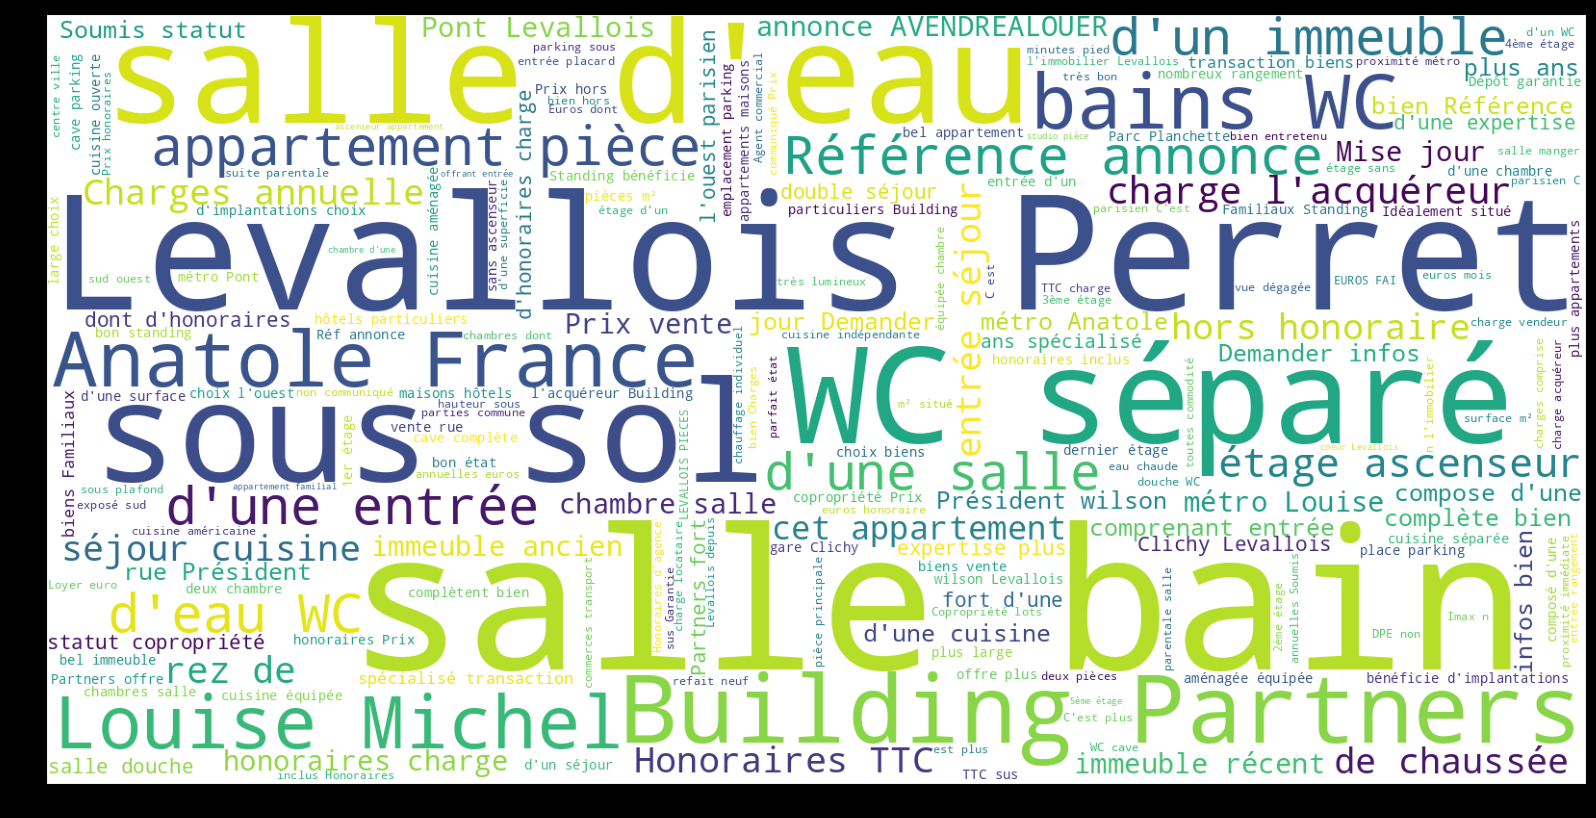

In [183]:
stop_words = stopwords.words('english') + stopwords.words('french')
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join([w for w in ' '.join(df['DESCRIPTION']).split(" ") if not w.lower() in stop_words]))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [100]:
model = SentenceTransformer('all-mpnet-base-v2')


In [184]:
l = df["DESCRIPTION"].tolist()

In [185]:
l = [w for w in l if not w.lower() in stop_words]

In [186]:
embedding = model.encode(l)

In [187]:
df["embedding"] = [i for i in embedding]

In [188]:
df = df.drop(["DESCRIPTION"], axis = 1)

In [190]:
df.columns

Index(['ID', 'URL', 'CRAWL_SOURCE', 'PROPERTY_TYPE', 'NEW_BUILD', 'IMAGES',
       'SURFACE', 'ROOM_COUNT', 'BEDROOM_COUNT', 'FURNISHED', 'GARDEN',
       'SWIMMING_POOL', 'TERRACE', 'PARKING', 'PARKING_COUNT', 'HEATING_TYPES',
       'HEATING_MODE', 'FLOOR', 'CONSTRUCTION_YEAR', 'ELEVATOR', 'CARETAKER',
       'MARKETING_TYPE', 'PRICE', 'PRICE_M2', 'RENTAL_EXPENSES',
       'RENTAL_EXPENSES_INCLUDED', 'DEPOSIT', 'FEES', 'FEES_INCLUDED',
       'EXCLUSIVE_MANDATE', 'AGENCIES_UNWANTED', 'OCCUPIED', 'DEALER_NAME',
       'DEALER_TYPE', 'PUBLICATION_START_DATE', 'embedding'],
      dtype='object')

In [192]:
df = df.drop(["PARKING", "PRICE_M2", "RENTAL_EXPENSES_INCLUDED", "FEES_INCLUDED"], axis=1)

# Prepare data

In [189]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_set_num = df.select_dtypes(include=numerics)
l=[]
for col in df.columns:
    if col not in df_num.columns:
        l.append(col)
df_cat = df[l]